In [4]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,CASE_NUMBER,age25_nodiploma,PERCENT_AGED_UNDER_18_OR_OVER_64,income_in_EGP,HARDSHIP_INDEX,low,medium,high
0,1.0,Rogers Park,7.7,23.6,8.7,HK587712,18.2,27.5,359085.0,-0.388146,1,0,0
1,2.0,West Ridge,7.8,17.2,8.8,HK456306,20.8,38.5,345600.0,-0.142320,1,0,0
2,3.0,Uptown,3.8,24.0,8.9,HT233595,11.8,22.2,536805.0,-1.055388,0,1,0
3,4.0,Lincoln Square,3.4,10.9,8.2,HT133522,13.4,25.5,562860.0,-1.160742,0,1,0
4,5.0,North Center,0.3,7.5,5.2,HZ138551,4.5,26.2,856845.0,-1.547040,0,1,0


In [7]:
df = df._get_numeric_data()

In [8]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('hardship index')
    plt.ylabel('age')

    plt.show()
    plt.close()

In [10]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim(0 , )
    plt.ylabel('hardship index')
    plt.legend()

In [11]:
df.columns

Index(['COMMUNITY_AREA_NUMBER', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'age25_nodiploma', 'PERCENT_AGED_UNDER_18_OR_OVER_64', 'income_in_EGP',
       'HARDSHIP_INDEX', 'low', 'medium', 'high'],
      dtype='object')

In [12]:
y_data = df['HARDSHIP_INDEX']

In [13]:
x_data=df.drop('HARDSHIP_INDEX',axis=1)

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 12
number of training samples: 64


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lre=LinearRegression()

In [19]:
lre.fit(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']], y_train)
lre.score(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']] , y_test)

0.2036057475866082

In [20]:
lre.score(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']] , y_train)

0.5228175118395518

 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

<h2>Cross-validation Score</h2>

In [21]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' PERCENT_AGED_UNDER_18_OR_OVER_64', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 
note that number of folds indicates the number of data splits 

In [22]:
Rcross = cross_val_score(lre, x_data[['PERCENT_AGED_UNDER_18_OR_OVER_64']], y_data, cv=4)

In [23]:
Rcross

array([-0.08397962,  0.48119249,  0.39116245,  0.24018648])

In [24]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.25714045219338766 and the standard deviation is 0.21494856928315012


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
yhat = cross_val_predict(lre,x_data[['PERCENT_AGED_UNDER_18_OR_OVER_64']], y_data,cv=4)
yhat[0:5]

array([-0.67589975,  0.36300985, -1.17646528, -0.8647924 , -0.79867997])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple linear regression objects and train the model using <b>'PERCENT_AGED_UNDER_18_OR_OVER_64'</b>, <b>'age25_nodiploma'</b>, as features.

In [28]:
lr = LinearRegression()
lr.fit(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
yhat_train = lr.predict(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']])
yhat_train[0:5]

array([-1.29867689,  0.39099045,  0.81070716, -1.45785088, -0.36221886])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


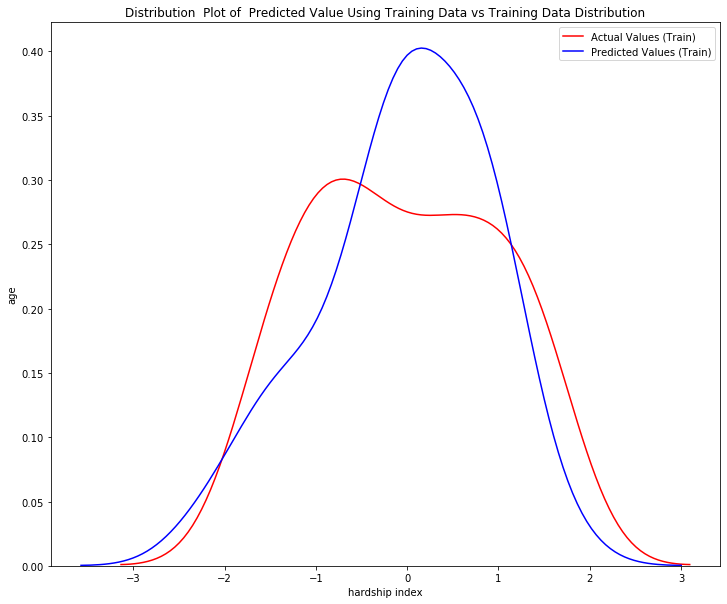

In [31]:
v

### let's visualize the test values results 

In [32]:
lr.fit(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']], y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
yhat_test = lr.predict(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']])
yhat_test[0:5]

array([ 0.0019934 ,  1.32945375, -0.48111727,  0.02360554,  0.89790968])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


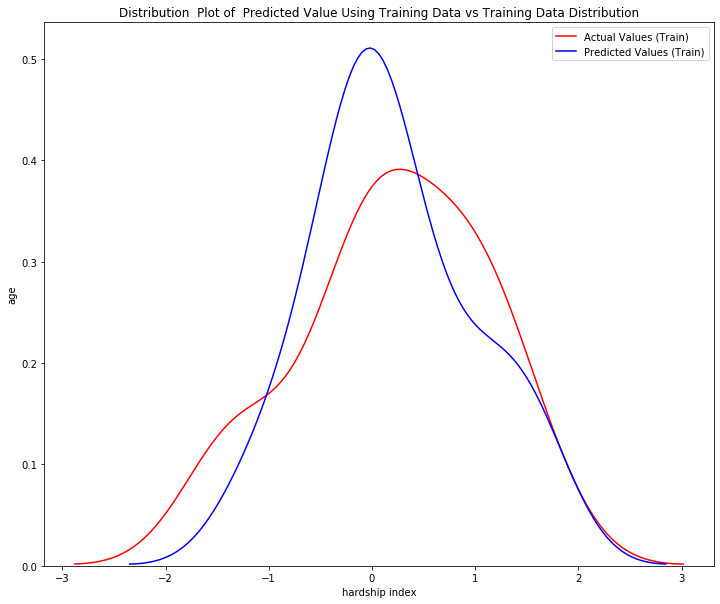

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

Let's use 50 percent of the data for testing and the rest for training:

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'PERCENT_AGED_UNDER_18_OR_OVER_64'</b>. 

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
x_test_pr = pr.fit_transform(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [39]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([10.67922846,  0.05731024, -0.98651746, -0.98535204, -0.11338779])

In [41]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [10.67922846  0.05731024 -0.98651746 -0.98535204]
True values: [ 1.683815    0.38444953 -1.40656775 -1.09050587]


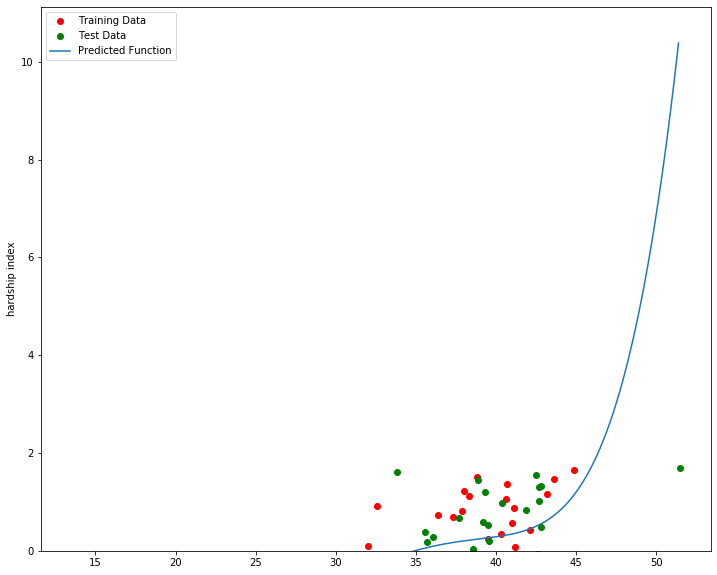

In [42]:
PollyPlot(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']], x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [43]:
poly.score(x_train_pr, y_train)

0.32916071564287785

 R^2 of the test data:

In [44]:
poly.score(x_test_pr, y_test)

-1.4606159453028296

We see the R^2 for the training data is 0.3291 while the R^2 on the test data was -1.4606.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

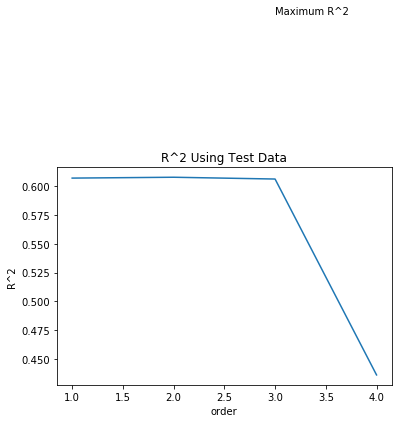

In [45]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
    
    x_test_pr = pr.fit_transform(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

In [46]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
    x_test_pr = pr.fit_transform(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64']], x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64']], y_train,y_test, poly, pr)

In [47]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge regression</h2> 

 In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

 Let's perform a degree two polynomial transformation on our data. 

In [48]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']])
x_test_pr=pr.fit_transform(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']])

In [49]:
from sklearn.linear_model import Ridge

In [50]:
RigeModel=Ridge(alpha=0.1)

In [51]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
yhat = RigeModel.predict(x_test_pr)

In [53]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 2.6334669   0.62041994 -1.08504798 -1.22666556]
test set : [ 1.683815    0.38444953 -1.40656775 -1.09050587]


In [54]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

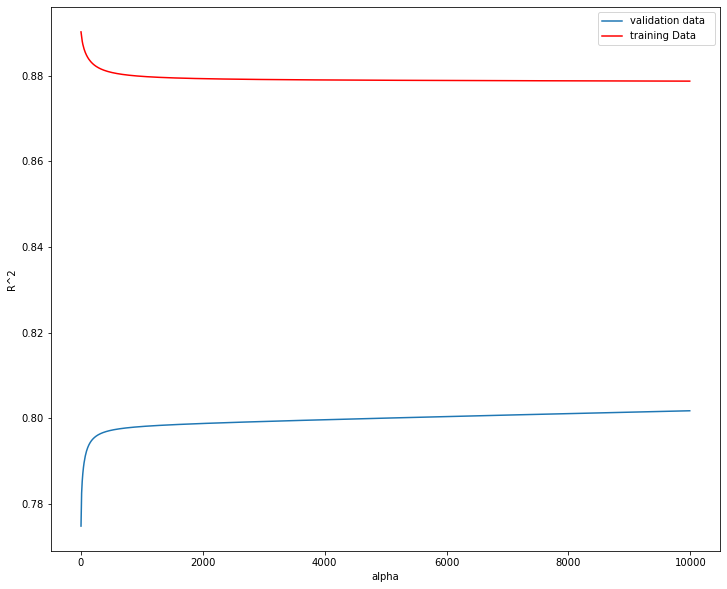

In [55]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<h2 id="ref4">Part 4: Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [59]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [62]:
Grid1.fit(x_data[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']], y_data)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [63]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 We now test our model on the test data 

In [64]:
BestRR.score(x_test[['PERCENT_AGED_UNDER_18_OR_OVER_64', 'age25_nodiploma']], y_test)

0.8197474285490891